In [1]:
import os
from os.path import isfile, join
import csv
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
path = '../../../../data/graphs/kw39/results_lm/{}/{}/{}'
dist = ['log', 'uniform']
modes = ['unary', 'binary', 'normalized', 'shifted_cut']

current_csv = dict(Distribution=[], Mode=[], k=[], Judgement=[], ARI=[], iJSD=[], Cluster_Number=[], Cluster_Diff=[])
for dis in dist:
    for mode in modes:
        for root, dirs, files in os.walk(path.format(dis, mode, '')):
            for csv_file in files:
                cp = path.format(dis, mode, csv_file)
                with open(cp, 'r') as file:
                    reader = csv.reader(file, delimiter='\t')

                    for ii, row in enumerate(reader):
                        if ii == 0:
                            continue
                        
                        current_csv['Distribution'].append(dis)
                        current_csv['Mode'].append(mode)
                        current_csv['k'].append(int(csv_file.split('-')[0].split('_')[3].replace('k', '')))
                        current_csv['Judgement'].append(int(row[0].replace(',', '')))
                        current_csv['ARI'].append(float(row[5].replace(',', '')))
                        current_csv['iJSD'].append(1 - float(row[4].replace(',', '')))
                        current_csv['Cluster_Number'].append(int(row[3].replace(',', '')))
                        current_csv['Cluster_Diff'].append(abs(int(csv_file.split('-')[0].split('_')[3].replace('k', '')) - int(row[3].replace(',', ''))))


df = pd.DataFrame(current_csv)
df.head(10)

,Distribution,Mode,k,Judgement,ARI,iJSD,Cluster_Number,Cluster_Diff
0,log,unary,8,10,0.000000,0.851607,2,6
1,log,unary,8,20,0.350394,0.889109,3,5
2,log,unary,8,30,0.046358,0.850991,3,5
3,log,unary,8,40,-0.006813,0.859824,4,4
4,log,unary,8,50,0.035754,0.799753,5,3
5,log,unary,8,100,-0.008995,0.747246,7,1
6,log,unary,8,200,-0.003343,0.741932,8,0
7,log,unary,8,300,0.000510,0.750500,7,1
8,log,unary,8,400,-0.011301,0.760606,7,1
9,log,unary,8,500,0.002028,0.776092,8,0


In [3]:
sns.set_theme(style="darkgrid")

checkpoints = [10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000, 2000,  3000, 4000, 5000]

In [4]:
df_overview = pd.melt(df, id_vars=['Judgement', 'Distribution', 'k', 'Cluster_Number', 'Cluster_Diff'], value_vars=['ARI', 'iJSD'], var_name='Measure', value_name='Performance')

df_overview.head()

,Judgement,Distribution,k,Cluster_Number,Cluster_Diff,Measure,Performance
0,10,log,8,2,6,ARI,0.000000
1,20,log,8,3,5,ARI,0.350394
2,30,log,8,3,5,ARI,0.046358
3,40,log,8,4,4,ARI,-0.006813
4,50,log,8,5,3,ARI,0.035754


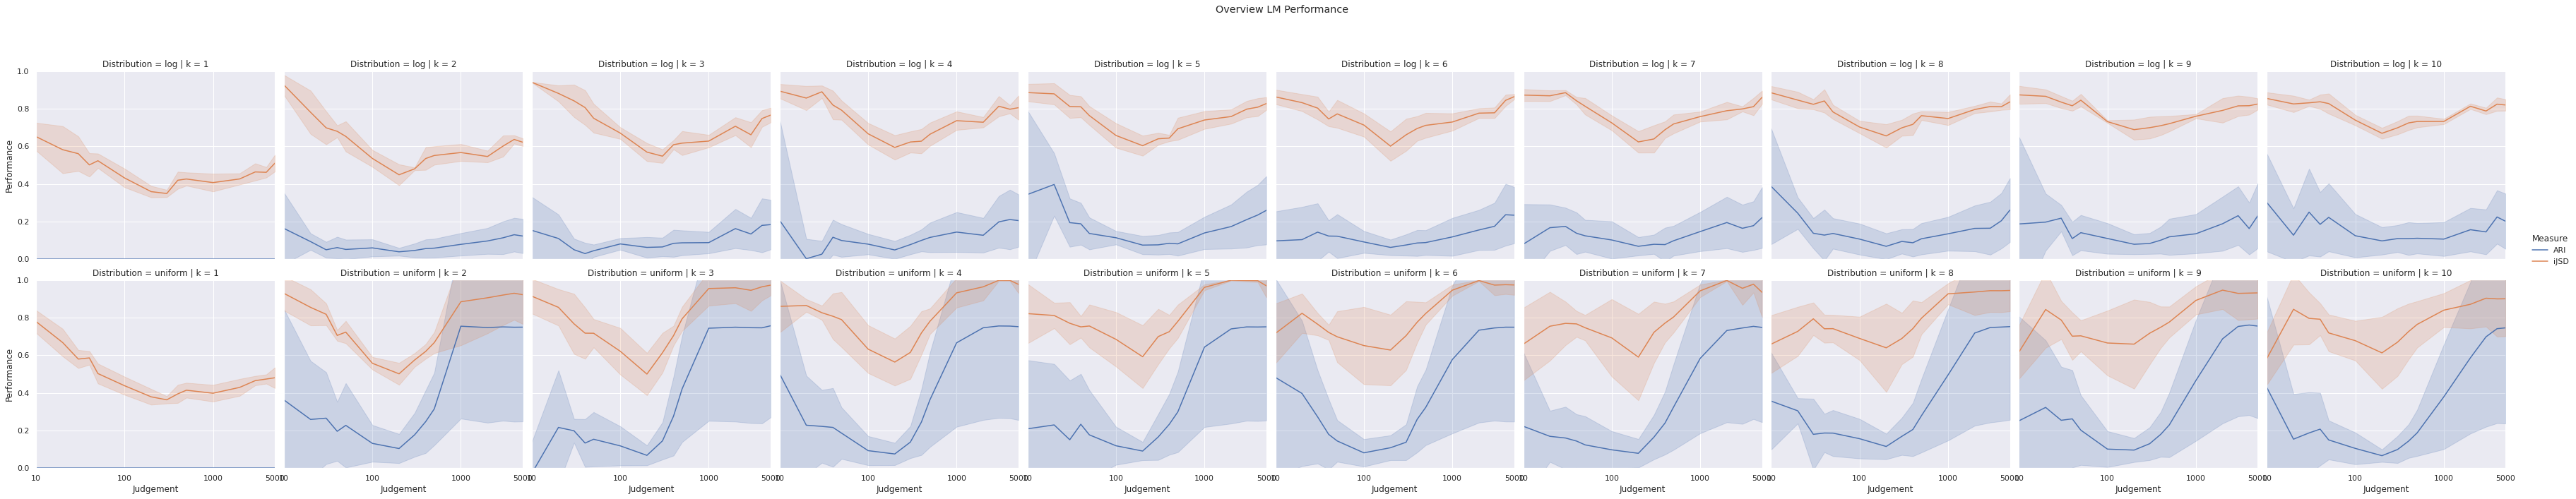

In [5]:
rp = sns.relplot(data=df_overview, x='Judgement', y='Performance', hue='Measure', col='k', row='Distribution', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.85)
rp.fig.suptitle('Overview LM Performance')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])
rp.set(ylim=[0.0, 1.0])
rp.set(xticks=[10, 100, 1000, 5000])
rp.set(xticklabels=['10', '100', '1000', '5000'])

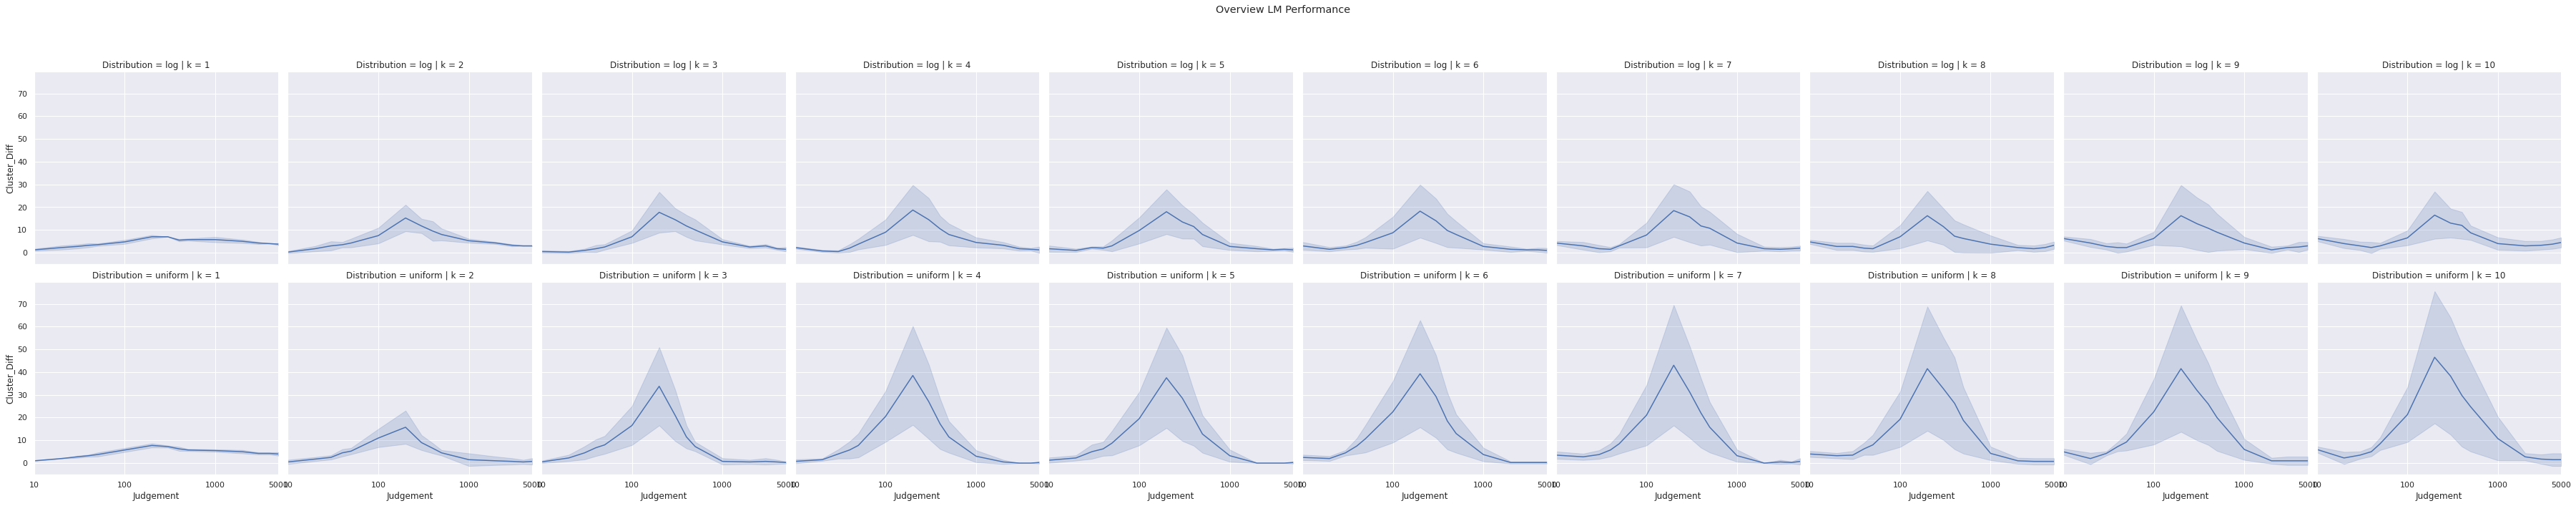

In [6]:
rp = sns.relplot(data=df_overview, x='Judgement', y='Cluster_Diff', col='k', row='Distribution', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.85)
rp.fig.suptitle('Overview LM Performance')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])
rp.set(xticks=[10, 100, 1000, 5000])
rp.set(xticklabels=['10', '100', '1000', '5000'])

In [7]:
df_overview = pd.melt(df[df.Distribution == 'uniform'], id_vars=['Judgement', 'Mode', 'k', 'Cluster_Number', 'Cluster_Diff'], value_vars=['ARI', 'iJSD'], var_name='Measure', value_name='Performance')

df_overview.head()

,Judgement,Mode,k,Cluster_Number,Cluster_Diff,Measure,Performance
0,10,unary,6,2,4,ARI,-0.250000
1,20,unary,6,3,3,ARI,0.015080
2,30,unary,6,3,3,ARI,0.056604
3,40,unary,6,4,2,ARI,0.001303
4,50,unary,6,5,1,ARI,0.042679


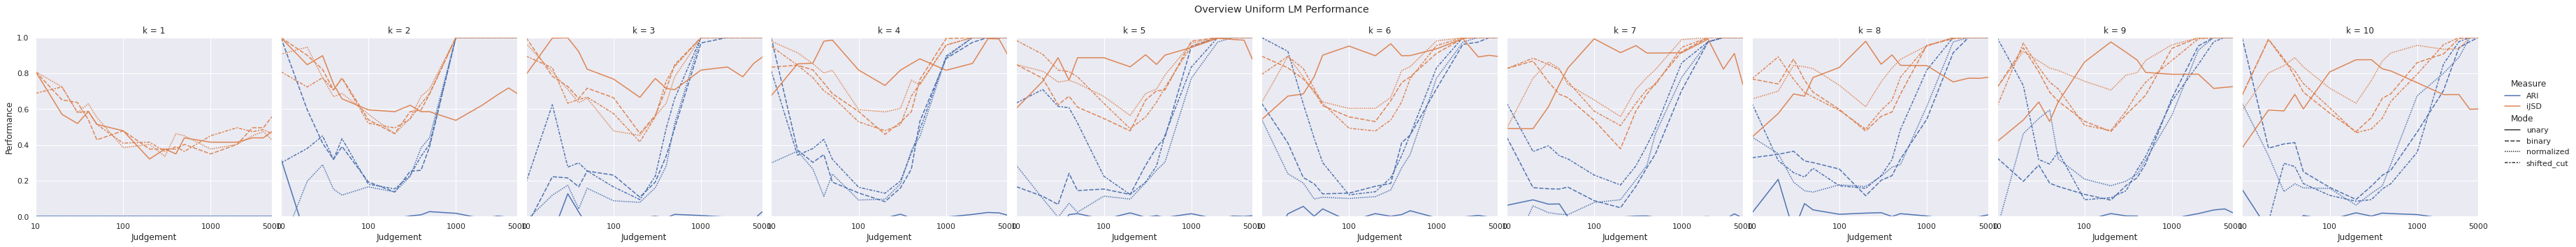

In [8]:
rp = sns.relplot(data=df_overview, x='Judgement', y='Performance', hue='Measure', col='k', style='Mode', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.85)
rp.fig.suptitle('Overview Uniform LM Performance')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])
rp.set(ylim=[0.0, 1.0])
rp.set(xticks=[10, 100, 1000, 5000])
rp.set(xticklabels=['10', '100', '1000', '5000'])

In [9]:
df_overview = pd.melt(df[df.Distribution == 'log'], id_vars=['Judgement', 'Mode', 'k', 'Cluster_Number', 'Cluster_Diff'], value_vars=['ARI', 'iJSD'], var_name='Measure', value_name='Performance')

df_overview.head()

,Judgement,Mode,k,Cluster_Number,Cluster_Diff,Measure,Performance
0,10,unary,8,2,6,ARI,0.000000
1,20,unary,8,3,5,ARI,0.350394
2,30,unary,8,3,5,ARI,0.046358
3,40,unary,8,4,4,ARI,-0.006813
4,50,unary,8,5,3,ARI,0.035754


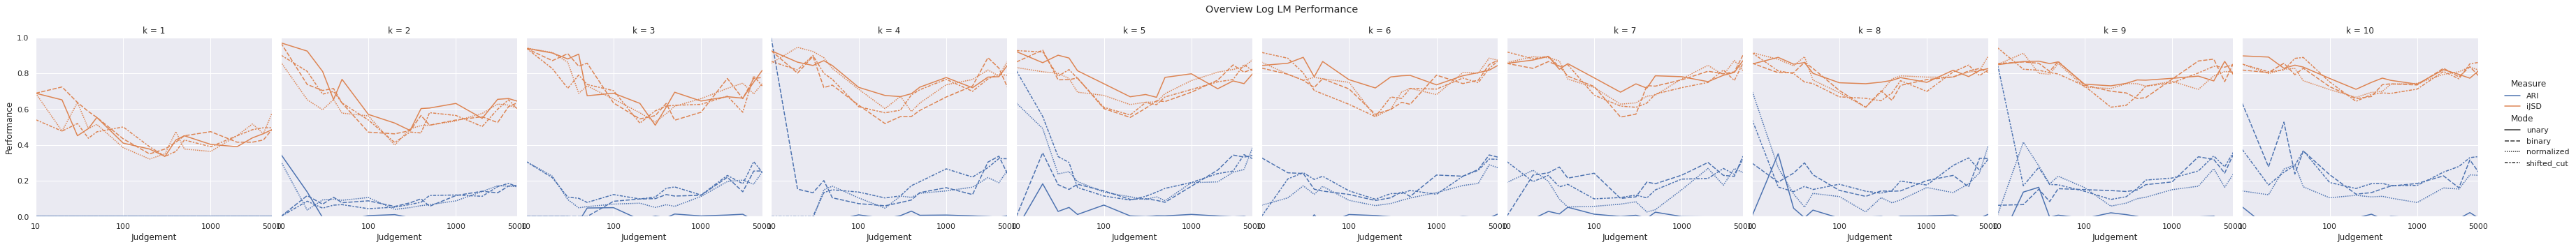

In [10]:
rp = sns.relplot(data=df_overview, x='Judgement', y='Performance', hue='Measure', col='k', style='Mode', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.85)
rp.fig.suptitle('Overview Log LM Performance')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])
rp.set(ylim=[0.0, 1.0])
rp.set(xticks=[10, 100, 1000, 5000])
rp.set(xticklabels=['10', '100', '1000', '5000'])